# importing the libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install xlrd

Defaulting to user installation because normal site-packages is not writeable


In [3]:
df = pd.read_csv("C:\\Users\\navee\\Downloads\\Bank_customers_data.csv")

In [4]:
df.head()

,Unnamed: 0,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance,loan,score,loan_eligibility
0,0,100000001,Simon,Walsh,Male,21,England,White Collar,05.Jan.15,113810.15,5252.0,644.0,2276203.00
1,1,400000002,Jasmine,Miller,Female,34,Northern Ireland,Blue Collar,06.Jan.15,36919.73,8907.0,697.0,0.00
2,2,100000003,Liam,Brown,Male,46,England,White Collar,07.Jan.15,101536.83,2162.0,617.0,2030736.60
3,3,300000004,Trevor,Parr,Male,32,Wales,White Collar,08.Jan.15,1421.52,7277.0,672.0,0.00
4,4,100000005,Deirdre,Pullman,Female,38,England,Blue Collar,09.Jan.15,35639.79,2586.0,405.0,178198.95


# EDA (Exploratory data analysis)

In [5]:
df.shape

(4014, 13)

# In this dataset there are 4014 data points and 13 columns.

In [6]:
df.describe()

,Unnamed: 0,Customer ID,Age,Balance,loan,score,loan_eligibility
count,4014.000000,4.014000e+03,4014.000000,4014.000000,4014.000000,4014.000000,4.014000e+03
mean,2006.500000,1.696831e+08,38.611111,39766.448274,5557.883159,501.068012,2.100837e+05
std,1158.886319,8.865374e+07,9.819121,29859.489192,2582.640099,113.666117,3.677718e+05
min,0.000000,1.000000e+08,15.000000,11.520000,1000.000000,300.000000,0.000000e+00
25%,1003.250000,1.000020e+08,31.000000,16115.367500,3366.000000,404.000000,0.000000e+00
50%,2006.500000,1.000038e+08,37.000000,33567.330000,5566.500000,502.000000,3.040905e+04
75%,3009.750000,2.000031e+08,45.000000,57533.930000,7768.750000,596.750000,2.787510e+05
max,4013.000000,4.000038e+08,64.000000,183467.700000,9996.000000,700.000000,3.633620e+06


# From above describe of statistical values of numerical cloumns, we can see the counts, mean, standard deviation of the distributions.

In [7]:
df['Unnamed: 0'].nunique()

4014

# Removing the 'Unnamed: 0' column, because it contains continuous numbers as index.

In [8]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [9]:
df.isnull().sum()

Customer ID           0
Name                  0
Surname               0
Gender                0
Age                   0
Region                0
Job Classification    0
Date Joined           0
Balance               0
loan                  0
score                 0
loan_eligibility      0
dtype: int64

# Here we can see that there are no null value data points in this dataset.

In [10]:
df.duplicated().value_counts()

False    4014
Name: count, dtype: int64

# And also there are no duplicate data in this dataset.

In [11]:
df.describe(include = 'object')

,Name,Surname,Gender,Region,Job Classification,Date Joined
count,4014,4014,4014,4014,4014,4014
unique,172,150,2,4,3,307
top,Jason,Kerr,Male,England,White Collar,24.Sep.15
freq,42,41,2165,2159,1955,67


# from above describe of categorical columns, we can see that there are 172 unique peoples and 150 surnames.

<Axes: xlabel='Age'>

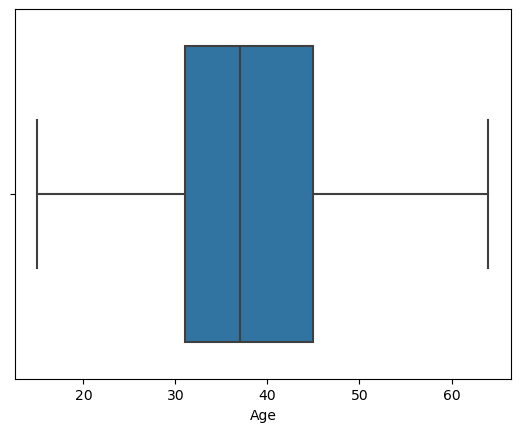

In [12]:
sns.boxplot(data = df, x = 'Age')

# From above boxplot of age column, the age group people are between 20 - 60 years.
# And there are no outliers.

<Axes: xlabel='Gender', ylabel='count'>

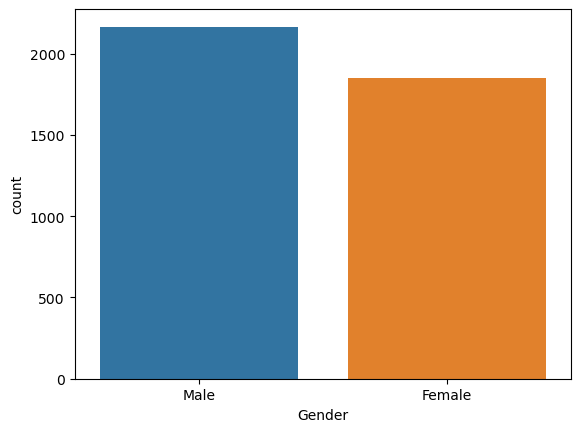

In [13]:
sns.countplot(data =df, x = 'Gender')

# Here we can see that there are little more males than females in this dataset. 

<Axes: xlabel='Job Classification', ylabel='count'>

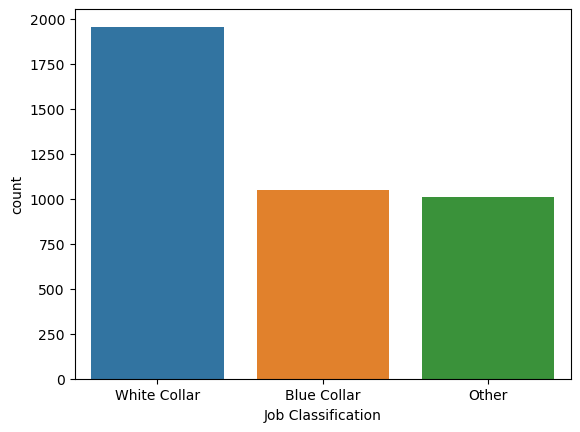

In [14]:
sns.countplot(data =df, x = 'Job Classification')

# There are 3 types of Job Classification in this dataset. And White Coller are more compared to Blue Coller and Other.

<Axes: xlabel='Balance'>

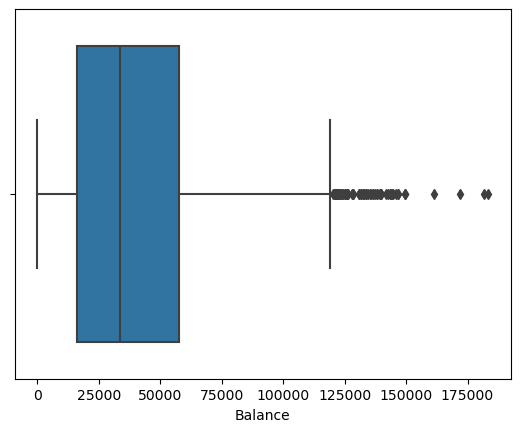

In [15]:
sns.boxplot(data = df, x = 'Balance')

In [16]:
df['Balance'].skew()

0.9762828952350865

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Balance', ylabel='Count'>

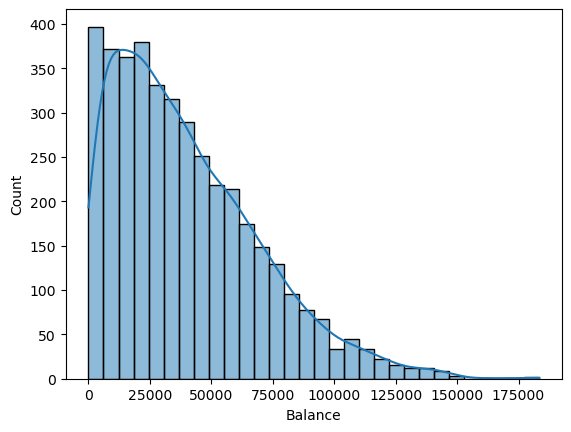

In [17]:
sns.histplot(data = df, x = 'Balance', kde= True, bins =30)

# There are outliers in Blance data column. 

<Axes: xlabel='loan'>

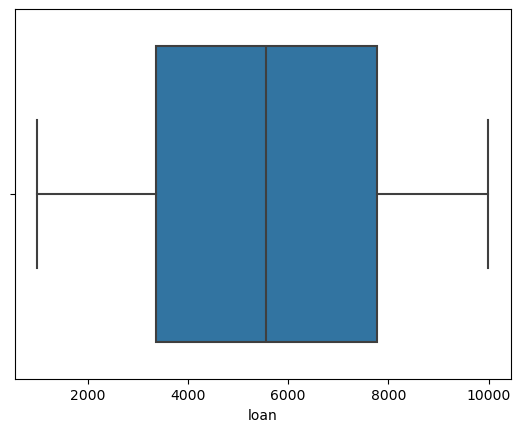

In [18]:
sns.boxplot(data =df, x = 'loan')

In [19]:
df['score'].nunique()

401

<Axes: xlabel='score'>

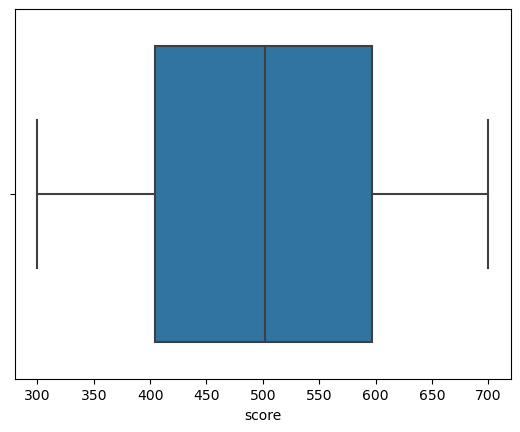

In [20]:
sns.boxplot(data =df, x = 'score')

# In Score data column, the score ranges from 300 to 700.

<Axes: xlabel='loan_eligibility'>

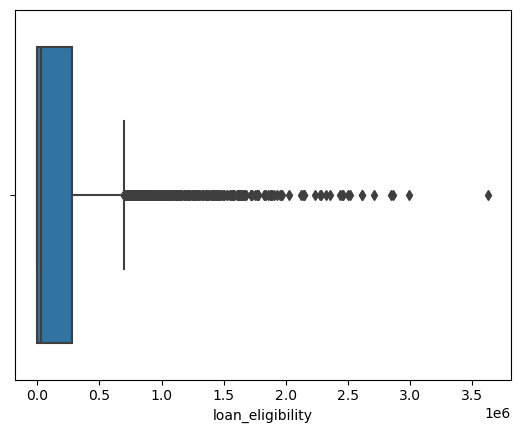

In [21]:
sns.boxplot(data=df, x = 'loan_eligibility')

In [22]:
df['loan_eligibility'].skew()

3.0298937501745815

# There are ouliers in Loan_eligibility data column.

In [23]:
corr = df.corr(numeric_only = True)
corr

,Customer ID,Age,Balance,loan,score,loan_eligibility
Customer ID,1.000000,0.081691,0.021428,0.005928,0.015504,-0.449097
Age,0.081691,1.000000,0.009359,0.001350,-0.014959,-0.217723
Balance,0.021428,0.009359,1.000000,0.038787,-0.001151,0.433671
loan,0.005928,0.001350,0.038787,1.000000,-0.028720,-0.002953
score,0.015504,-0.014959,-0.001151,-0.028720,1.000000,0.299763
loan_eligibility,-0.449097,-0.217723,0.433671,-0.002953,0.299763,1.000000


In [24]:
numerical_df = df.select_dtypes(include=['number'])
numerical_df.head()

,Customer ID,Age,Balance,loan,score,loan_eligibility
0,100000001,21,113810.15,5252.0,644.0,2276203.00
1,400000002,34,36919.73,8907.0,697.0,0.00
2,100000003,46,101536.83,2162.0,617.0,2030736.60
3,300000004,32,1421.52,7277.0,672.0,0.00
4,100000005,38,35639.79,2586.0,405.0,178198.95


In [25]:
num = numerical_df.drop(['loan_eligibility'], axis = 1)

# By using IQR method, finding and removing outliers fron the dataset of numerical columns.

In [26]:
for k,v in num.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    v_col = v[(v >= lower_bound) & (v <= upper_bound)]
    
    # Dropping outliers from the original DataFrame
    df = df[df[k].isin(v_col)]
    
    # Calculate the percentage of outliers
    perc = (len(v) - len(v_col)) * 100 / len(num)
    print('Column {} outliers dropped: {:.2f}%'.format(k,perc))

Column Customer ID outliers dropped: 5.26%
Column Age outliers dropped: 0.00%
Column Balance outliers dropped: 1.67%
Column loan outliers dropped: 0.00%
Column score outliers dropped: 0.00%


In [27]:
df.head()

,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance,loan,score,loan_eligibility
0,100000001,Simon,Walsh,Male,21,England,White Collar,05.Jan.15,113810.15,5252.0,644.0,2276203.00
2,100000003,Liam,Brown,Male,46,England,White Collar,07.Jan.15,101536.83,2162.0,617.0,2030736.60
3,300000004,Trevor,Parr,Male,32,Wales,White Collar,08.Jan.15,1421.52,7277.0,672.0,0.00
4,100000005,Deirdre,Pullman,Female,38,England,Blue Collar,09.Jan.15,35639.79,2586.0,405.0,178198.95
6,100000007,Dorothy,Thomson,Female,34,England,Blue Collar,11.Jan.15,42879.84,2644.0,467.0,214399.20


In [28]:
df.shape

(3741, 12)

# After removing outliers we got 3741 data points.

In [29]:
df.describe()

,Customer ID,Age,Balance,loan,score,loan_eligibility
count,3.741000e+03,3741.000000,3741.000000,3741.000000,3741.000000,3.741000e+03
mean,1.568852e+08,39.105052,38209.166068,5548.301524,500.416466,2.106520e+05
std,7.190166e+07,9.727019,27341.924925,2589.135302,113.380012,3.432424e+05
min,1.000000e+08,18.000000,11.520000,1000.000000,300.000000,0.000000e+00
25%,1.000019e+08,32.000000,15879.520000,3360.000000,403.000000,0.000000e+00
50%,1.000036e+08,38.000000,32973.730000,5545.000000,501.000000,5.218560e+04
75%,2.000025e+08,46.000000,56122.610000,7769.000000,595.000000,2.904050e+05
max,3.000040e+08,64.000000,119118.390000,9996.000000,700.000000,2.358935e+06


# convert Date Joined to seperate month, year and day column

In [30]:
df['Date Joined'] = pd.to_datetime(df['Date Joined'])
df['Year'] = df['Date Joined'].dt.year
df['Month'] = df['Date Joined'].dt.month
df['Day'] = df['Date Joined'].dt.day


C:\Users\navee\AppData\Local\Temp\ipykernel_17160\1095418674.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date Joined'] = pd.to_datetime(df['Date Joined'])


In [31]:
df.head()

,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance,loan,score,loan_eligibility,Year,Month,Day
0,100000001,Simon,Walsh,Male,21,England,White Collar,2015-01-05,113810.15,5252.0,644.0,2276203.00,2015,1,5
2,100000003,Liam,Brown,Male,46,England,White Collar,2015-01-07,101536.83,2162.0,617.0,2030736.60,2015,1,7
3,300000004,Trevor,Parr,Male,32,Wales,White Collar,2015-01-08,1421.52,7277.0,672.0,0.00,2015,1,8
4,100000005,Deirdre,Pullman,Female,38,England,Blue Collar,2015-01-09,35639.79,2586.0,405.0,178198.95,2015,1,9
6,100000007,Dorothy,Thomson,Female,34,England,Blue Collar,2015-01-11,42879.84,2644.0,467.0,214399.20,2015,1,11


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

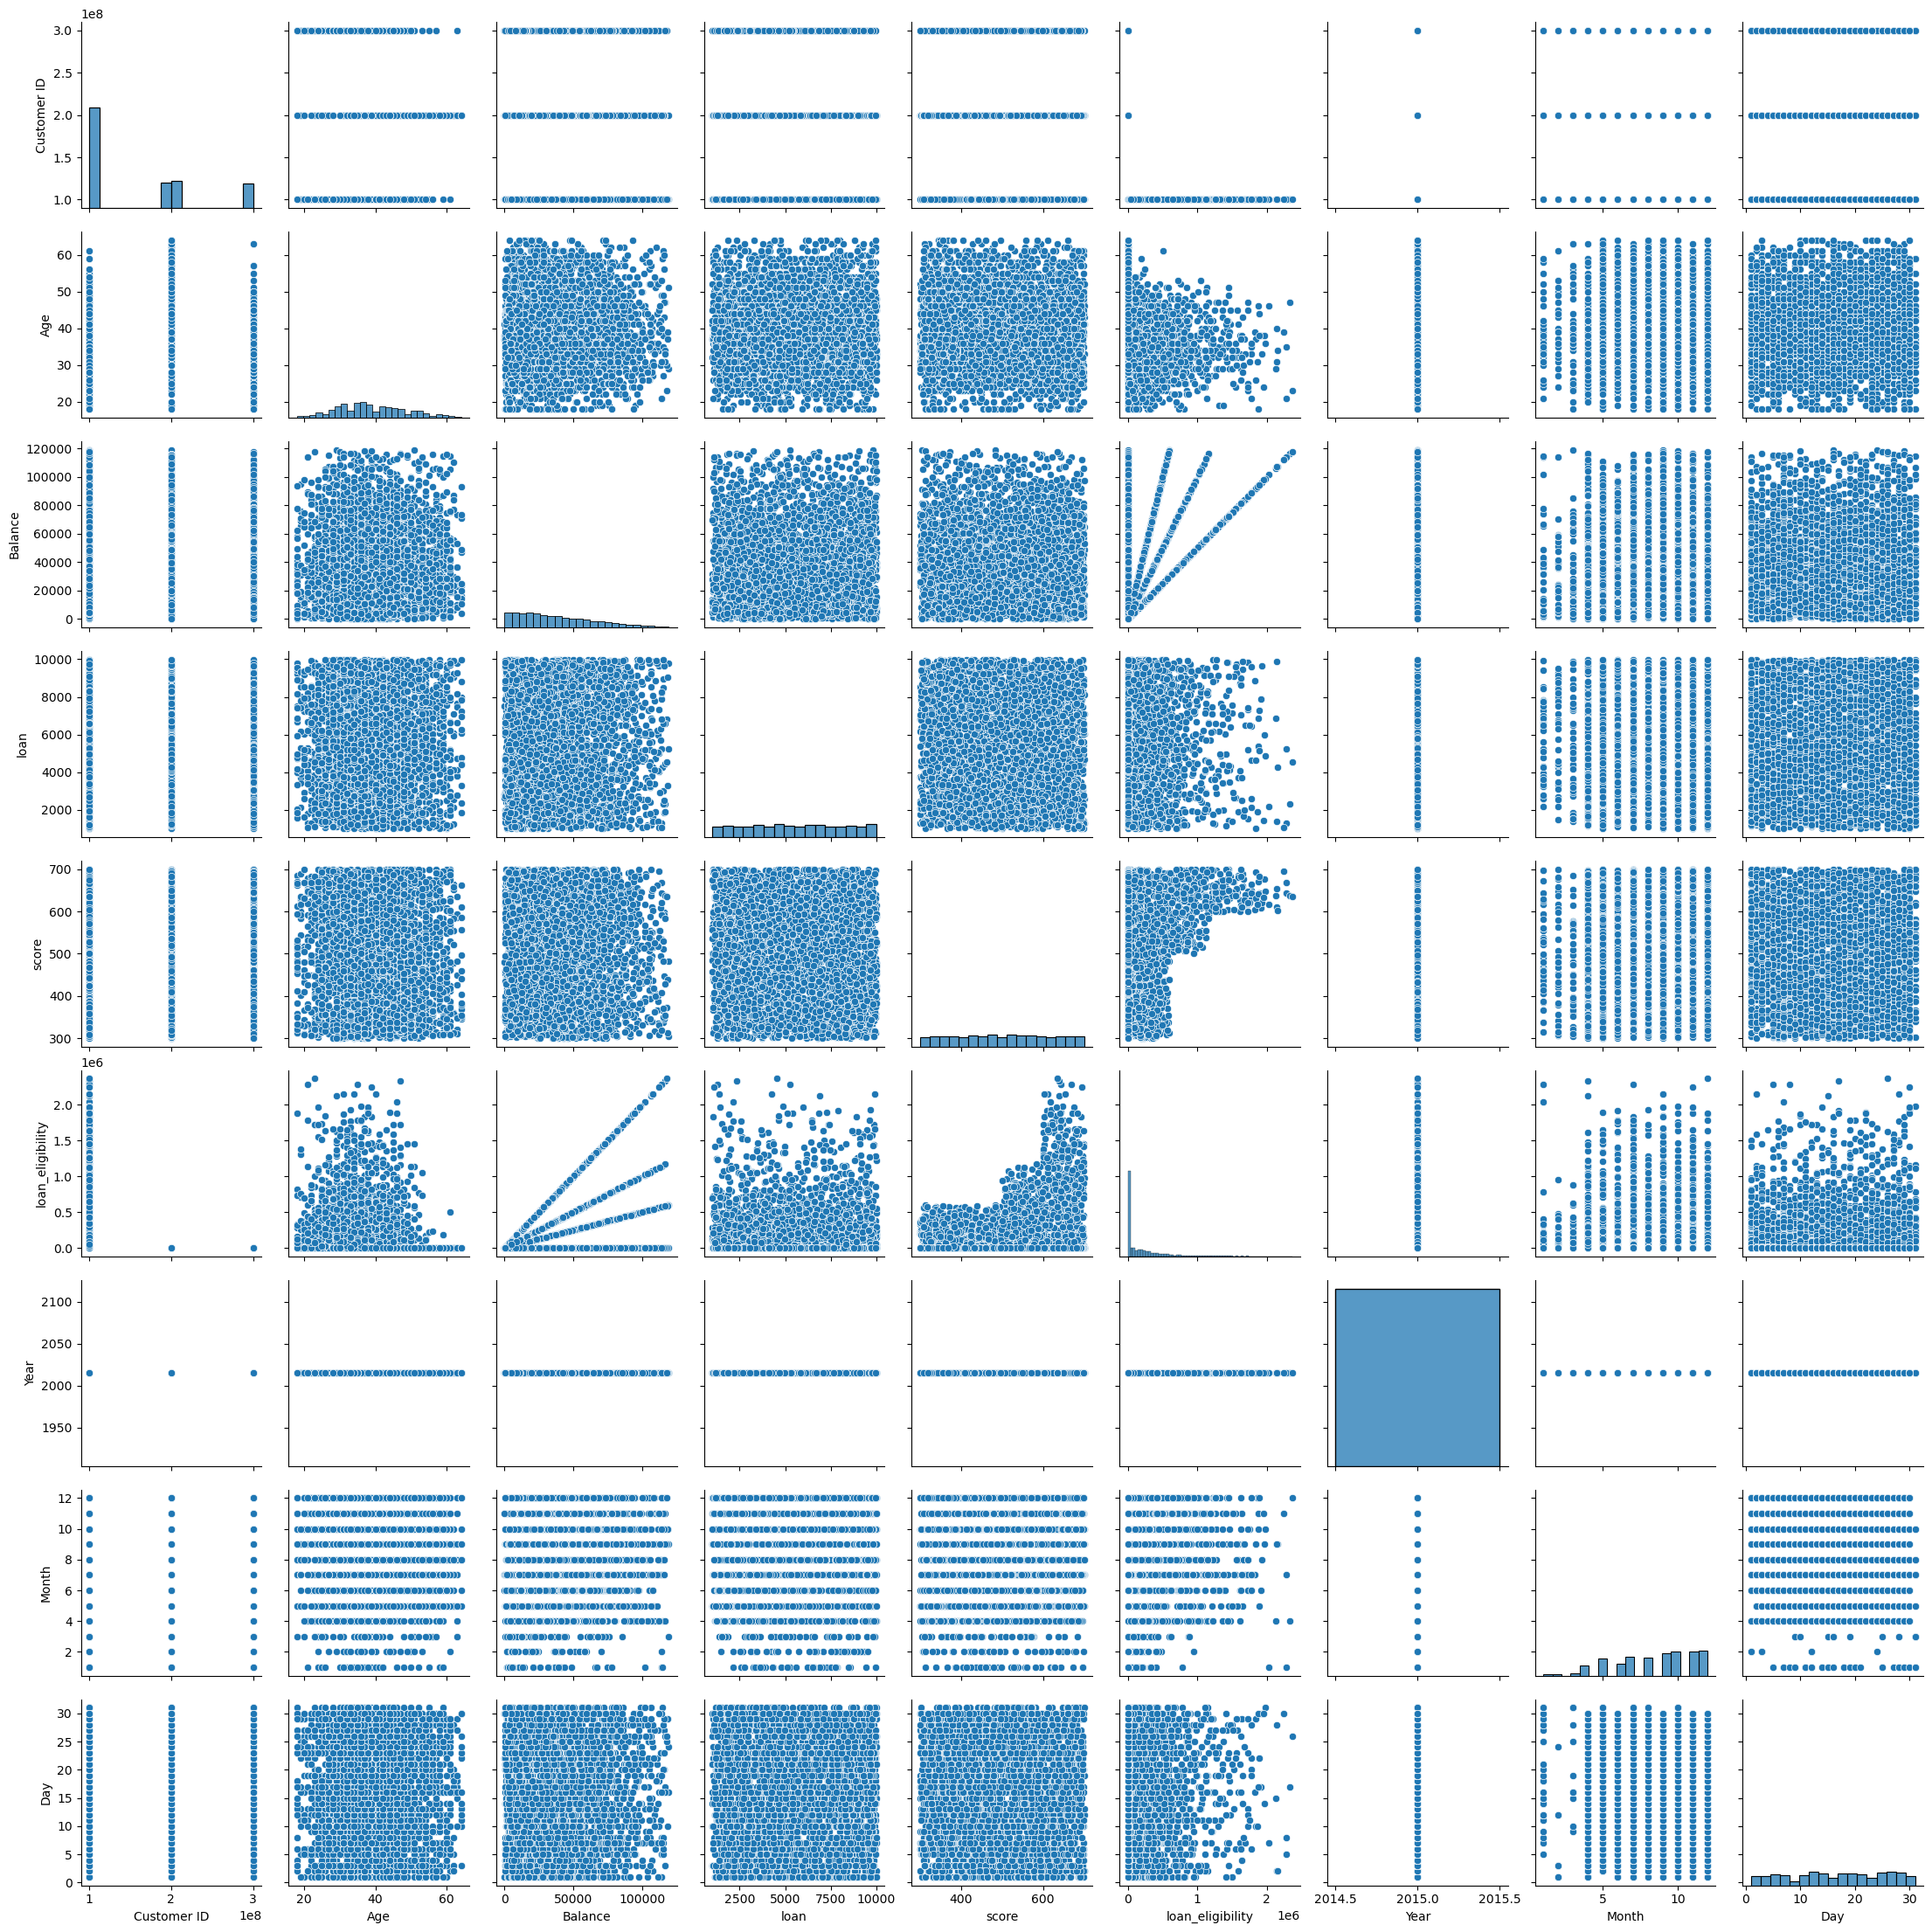

In [32]:
sns.pairplot(data=df)

In [33]:
d1 = df.groupby("Job Classification")['loan_eligibility']
d1.sum()

Job Classification
Blue Collar     119671357.5
Other           125750499.3
White Collar    542627428.3
Name: loan_eligibility, dtype: float64

In [34]:
profit_sales = df.groupby(["Job Classification"])[['loan_eligibility','Balance']]
profit_sales.sum()

,loan_eligibility,Balance
Job Classification,,
Blue Collar,119671357.5,37403960.33
Other,125750499.3,35431162.96
White Collar,542627428.3,70105366.97


In [35]:
df['Customer ID'].nunique()	

3741

In [36]:
df = df.drop(['Customer ID', 'Date Joined'], axis =1)

In [37]:
d1 = df.groupby("Name")['Surname']

d1.value_counts()

Name     Surname 
Abigail  Abraham     1
         Randall     1
         Blake       1
         Buckland    1
         Ferguson    1
                    ..
Zoe      Randall     1
         Reid        1
         Vaughan     1
         Wright      1
         Young       1
Name: count, Length: 3692, dtype: int64

In [38]:
df.head()

,Name,Surname,Gender,Age,Region,Job Classification,Balance,loan,score,loan_eligibility,Year,Month,Day
0,Simon,Walsh,Male,21,England,White Collar,113810.15,5252.0,644.0,2276203.00,2015,1,5
2,Liam,Brown,Male,46,England,White Collar,101536.83,2162.0,617.0,2030736.60,2015,1,7
3,Trevor,Parr,Male,32,Wales,White Collar,1421.52,7277.0,672.0,0.00,2015,1,8
4,Deirdre,Pullman,Female,38,England,Blue Collar,35639.79,2586.0,405.0,178198.95,2015,1,9
6,Dorothy,Thomson,Female,34,England,Blue Collar,42879.84,2644.0,467.0,214399.20,2015,1,11


# now encode the categorical columns of the dataset

In [39]:
from sklearn.preprocessing import LabelEncoder

label_e=LabelEncoder()
categ_columns=df.select_dtypes(include=['object']).columns

for col in categ_columns:
    df[col]=label_e.fit_transform(df[col])

df

,Name,Surname,Gender,Age,Region,Job Classification,Balance,loan,score,loan_eligibility,Year,Month,Day
0,148,142,1,21,0,2,113810.15,5252.0,644.0,2276203.00,2015,1,5
2,101,16,1,46,0,2,101536.83,2162.0,617.0,2030736.60,2015,1,7
3,160,101,1,32,2,2,1421.52,7277.0,672.0,0.00,2015,1,8
4,41,110,0,38,0,0,35639.79,2586.0,405.0,178198.95,2015,1,9
6,46,134,0,34,0,0,42879.84,2644.0,467.0,214399.20,2015,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4009,140,73,1,64,1,1,19711.66,9957.0,586.0,0.00,2015,12,30
4010,94,58,1,52,1,0,56069.72,6701.0,319.0,0.00,2015,12,30
4011,63,129,0,50,1,1,59477.82,7650.0,682.0,0.00,2015,12,30
4012,34,115,1,51,1,0,239.45,4682.0,369.0,0.00,2015,12,30


# seperating the dataset into features and target variable datasets.

In [40]:
X = df.drop(['loan_eligibility'], axis = 1)
y = df['loan_eligibility']

# spliting the data into train and test data sets.

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [42]:
print(X_train.shape,X_test.shape)

(2618, 12) (1123, 12)


In [43]:
print(y_train.shape,y_test.shape)

(2618,) (1123,)


# Building and fitting the DecisionTreeRegressor algorithm.

In [44]:
from sklearn.tree import DecisionTreeRegressor


tree_reg = DecisionTreeRegressor(random_state=42, max_depth=4, min_samples_split=4)
tree_reg.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=4, min_samples_split=4, random_state=42)

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [46]:
from numpy import sqrt

# checking the MSE, MAE, RMSE, and r2_score on train data.

In [47]:
y_train_pred = tree_reg.predict(X_train)

In [48]:
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = sqrt(mse)

r2 = r2_score(y_train, y_train_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error", rmse)
print("R-squared:", r2)

Mean Absolute Error: 50337.570845742004
Mean Squared Error: 7389015569.659443
Root Mean Squared Error 85959.38325546225
R-squared: 0.9391835976438847


# checking the MSE, MAE, RMSE, and r2_score on test data.


In [49]:
y_pred = tree_reg.predict(X_test)

In [50]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = sqrt(mse)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error", rmse)

print("R-squared:", r2)


Mean Absolute Error: 48888.899892221
Mean Squared Error: 7224167031.248538
Root Mean Squared Error 84995.1000425821
R-squared: 0.9334892332516235


# Building and fitting the RandomForestRegressor.

In [51]:
from sklearn.ensemble import RandomForestRegressor

rf_reg=RandomForestRegressor(n_estimators=100,random_state=42)
rf_reg.fit(X_train,y_train)


RandomForestRegressor(random_state=42)

# checking the MSE, MAE, RMSE, and r2_score on train data.

In [52]:
y_train_pred1 = tree_reg.predict(X_train)

In [53]:
mae = mean_absolute_error(y_train, y_train_pred1)
mse = mean_squared_error(y_train, y_train_pred1)
rmse = sqrt(mse)

r2 = r2_score(y_train, y_train_pred1)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error", rmse)
print("R-squared:", r2)

Mean Absolute Error: 50337.570845742004
Mean Squared Error: 7389015569.659443
Root Mean Squared Error 85959.38325546225
R-squared: 0.9391835976438847


# checking the MSE, MAE, RMSE, and r2_score on test data.


In [54]:
y_pred1 = tree_reg.predict(X_test)

In [55]:
mae = mean_absolute_error(y_test, y_pred1)
mse = mean_squared_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)
rmse = sqrt(mse)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error", rmse)

print("R-squared:", r2)


Mean Absolute Error: 48888.899892221
Mean Squared Error: 7224167031.248538
Root Mean Squared Error 84995.1000425821
R-squared: 0.9334892332516235


# Building and fitting the LinearRegressor

# before building the LinearRegression model first do scaling

In [56]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
cont_columns = df.select_dtypes(include = ['number']).columns
df[cont_columns] = scaler.fit_transform(df[cont_columns])

df.head()

,Name,Surname,Gender,Age,Region,Job Classification,Balance,loan,score,loan_eligibility,Year,Month,Day
0,0.741176,0.917808,0.0,-1.214286,0.0,0.5,2.008703,-0.066455,0.744792,7.658330,0.0,-1.6,-0.857143
2,0.188235,-0.808219,0.0,0.571429,0.0,0.5,1.703724,-0.767294,0.604167,6.813075,0.0,-1.6,-0.714286
3,0.882353,0.356164,0.0,-0.428571,2.0,0.5,-0.784040,0.392833,0.890625,-0.179699,0.0,-1.6,-0.642857
4,-0.517647,0.479452,-1.0,0.000000,0.0,-0.5,0.066249,-0.671127,-0.500000,0.433923,0.0,-1.6,-0.571429
6,-0.458824,0.808219,-1.0,-0.285714,0.0,-0.5,0.246157,-0.657972,-0.177083,0.558577,0.0,-1.6,-0.428571


In [57]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

# checking the MSE, MAE, RMSE, and r2_score on train data.

In [58]:
y_train_pred2 = tree_reg.predict(X_train)

In [59]:
mae1 = mean_absolute_error(y_train, y_train_pred2)
mse2 = mean_squared_error(y_train, y_train_pred2)
rmse3 = sqrt(mse2)

r2 = r2_score(y_train, y_train_pred2)

print("Mean Absolute Error:", mae1)
print("Mean Squared Error:", mse2)
print("Root Mean Squared Error", rmse3)
print("R-squared:", r2)

Mean Absolute Error: 50337.570845742004
Mean Squared Error: 7389015569.659443
Root Mean Squared Error 85959.38325546225
R-squared: 0.9391835976438847


# checking the MSE, MAE, RMSE, and r2_score on test data.

In [60]:
y_pred3 = tree_reg.predict(X_test)

In [61]:
mae = mean_absolute_error(y_test, y_pred3)
mse = mean_squared_error(y_test, y_pred3)
r2 = r2_score(y_test, y_pred3)
rmse = sqrt(mse)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error", rmse)

print("R-squared:", r2)


Mean Absolute Error: 48888.899892221
Mean Squared Error: 7224167031.248538
Root Mean Squared Error 84995.1000425821
R-squared: 0.9334892332516235


# Cross validation using LinearRegression

In [62]:
from sklearn.model_selection import cross_val_score
mse_scores = cross_val_score(lin_reg, X, y, cv=5, scoring='r2')


In [63]:
print("R2 Scores:", mse_scores)


R2 Scores: [0.52286239 0.57009226 0.54510377 0.5470599  0.55221556]


In [64]:
print('Average cross-validation score: {:.4f}'.format(mse_scores.mean()))

Average cross-validation score: 0.5475
